<a href="https://colab.research.google.com/github/Bingyy/DeepLearning/blob/master/IMDB%E6%95%B0%E6%8D%AE%E9%9B%86%E4%B8%8A%E7%9A%84%E4%BA%8C%E5%88%86%E7%B1%BB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 任务描述

根据电影评论的文字内容来将电影划分为正面或者负面。

#### IMDB数据集

50000条两级分化的评论。正面负面各为50%。

In [1]:
# 加载数据
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000) # 仅保留训练数据中前10000个最经常出现的单词，低频单词被舍弃

Using TensorFlow backend.


17465344/17464789 [==============================] - 1s 0us/step


In [2]:
train_data.shape

(25000,)

In [3]:
len(train_data[0])

218

In [4]:
train_labels[0] # 0表示负面，1表示正面

1

In [5]:
len(train_data[1])

189

In [6]:
len(train_data[100])

158

In [7]:
max([max(sequence) for sequence in train_data])

9999

In [8]:
# 将某条评论解码为英文单词
word_index = imdb.get_word_index()

1646592/1641221 [==============================] - 0s 0us/step


In [9]:
word_index

{'fawn': 34701,
 'tsukino': 52006,
 'nunnery': 52007,
 'sonja': 16816,
 'vani': 63951,
 'woods': 1408,
 'spiders': 16115,
 'hanging': 2345,
 'woody': 2289,
 'trawling': 52008,
 "hold's": 52009,
 'comically': 11307,
 'localized': 40830,
 'disobeying': 30568,
 "'royale": 52010,
 "harpo's": 40831,
 'canet': 52011,
 'aileen': 19313,
 'acurately': 52012,
 "diplomat's": 52013,
 'rickman': 25242,
 'arranged': 6746,
 'rumbustious': 52014,
 'familiarness': 52015,
 "spider'": 52016,
 'hahahah': 68804,
 "wood'": 52017,
 'transvestism': 40833,
 "hangin'": 34702,
 'bringing': 2338,
 'seamier': 40834,
 'wooded': 34703,
 'bravora': 52018,
 'grueling': 16817,
 'wooden': 1636,
 'wednesday': 16818,
 "'prix": 52019,
 'altagracia': 34704,
 'circuitry': 52020,
 'crotch': 11585,
 'busybody': 57766,
 "tart'n'tangy": 52021,
 'burgade': 14129,
 'thrace': 52023,
 "tom's": 11038,
 'snuggles': 52025,
 'francesco': 29114,
 'complainers': 52027,
 'templarios': 52125,
 '272': 40835,
 '273': 52028,
 'zaniacs': 52130,

In [0]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()]) # 键值翻转

In [0]:
decode_review = ' '.join([reverse_word_index.get(i-3, '?') for i in train_data[0]]) # 评论解码，索引去掉3，0为填充，1为序列开始，2位unknown

In [12]:
decode_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [13]:
train_data

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1153, 194, 8255, 78, 228,

输出train_data可以看出，这是没办法直接用的，外层是一个一维数组，里面是list，从含义上看这是二维数组，而形式上则不是我们需要的(samples, word_indices)这种格式。

In [0]:
# 数据准备，将列表转换为张量
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1. # sequence是个数组，按照数组对results进行选择
  return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [15]:
x_train.shape

(25000, 10000)

In [16]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [17]:
len(x_train[0])

10000

In [18]:
for i, sequence in enumerate(train_data):
  if i == 10:
    break
  print(i, sequence)

0 [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
1 [1, 194, 1153, 194, 8255, 78, 228, 5, 6, 1463, 4369, 501

In [19]:
test_labels

array([0, 1, 1, ..., 0, 0, 0])

In [0]:
# 标签向量化
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

至此数据就准备好了，可以输入到神经网络中了。

In [0]:
# 构建网络
# 输入数据是一条向量，目标值为标量
# 这是最简单的情况
# 这类问题有个表现很好的模型：带relu激活函数的全连接层的简单堆叠
# 两个中间层，每层16个隐藏单元
# 第三层输出一个标量，预测当前评论的情感
# 最后一层用sigmoid激活函数输出一个概率值
# 16 --> 16 --> 1
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [0]:
# 现在我们需要选择损失函数和优化器，
# 问题是一个二分类问题
# https://blog.csdn.net/u011240016/article/details/85150443
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [23]:
# 留出验证集
x_val = x_train[:5000]
partial_x_train = x_train[5000:]

y_val = y_train[:5000]
partial_y_train = y_train[5000:]

# 训练模型
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Train on 20000 samples, validate on 5000 samples
Epoch 1/20
20000/20000 [==============================] - 3s 136us/step - loss: 0.4713 - acc: 0.8052 - val_loss: 0.3679 - val_acc: 0.8578
Epoch 2/20
20000/20000 [==============================] - 2s 102us/step - loss: 0.2720 - acc: 0.9052 - val_loss: 0.2945 - val_acc: 0.8864
Epoch 3/20
20000/20000 [==============================] - 2s 102us/step - loss: 0.2026 - acc: 0.9308 - val_loss: 0.2698 - val_acc: 0.8910
Epoch 4/20
20000/20000 [==============================] - 2s 101us/step - loss: 0.1671 - acc: 0.9416 - val_loss: 0.2799 - val_acc: 0.8906
Epoch 5/20
20000/20000 [==============================] - 2s 102us/step - loss: 0.1409 - acc: 0.9517 - val_loss: 0.2828 - val_acc: 0.8904
Epoch 6/20
20000/20000 [==============================] - 2s 101us/step - loss: 0.1187 - acc: 0.9604 - val_loss: 0.3065 - val_acc: 0.8864
Epoch 7/20
20000/20000 [==============================] - 2s 101us/step - loss: 0.1067 - acc: 0.9644 - val_loss: 0.3269 - v

In [24]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

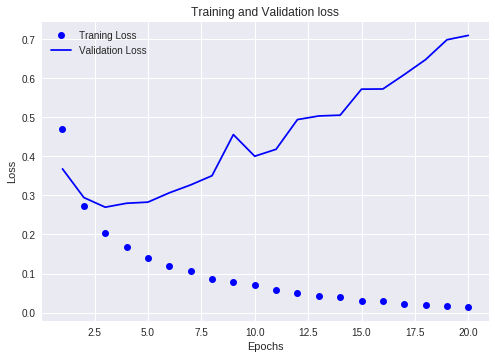

In [25]:
# 绘制训练损失和验证损失
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Traning Loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation Loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

分析这个图可以看到，训练损失逐渐减小，但是验证损失先降低后提升，所以越往后，对训练数据越优化使得模型过拟合了。所以这里可以先在第三轮之后停止训练。

In [27]:
# 新建一个模型
model2 = models.Sequential()
model2.add(layers.Dense(16, activation='relu', input_shape=(10000,))) # 输入层
model2.add(layers.Dense(16, activation='relu'))
model2.add(layers.Dense(1, activation='sigmoid'))

model2.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model2.fit(x_train, y_train, epochs=4, batch_size=512)

results = model2.evaluate(x_test, y_test)


Epoch 1/4
25000/25000 [==============================] - 3s 107us/step - loss: 0.4570 - acc: 0.8204
Epoch 2/4
25000/25000 [==============================] - 2s 92us/step - loss: 0.2620 - acc: 0.9092
Epoch 3/4
25000/25000 [==============================] - 2s 89us/step - loss: 0.2014 - acc: 0.9293
Epoch 4/4
25000/25000 [==============================] - 2s 69us/step


In [28]:
print(results)

[0.29334229942321777, 0.88356]


In [0]:
res = model2.predict(x_test) # 网络输出的是sigmoid概率

In [30]:
res

array([[0.16456558],
       [0.9996093 ],
       [0.7976105 ],
       ...,
       [0.10431715],
       [0.07220688],
       [0.6143431 ]], dtype=float32)

In [31]:
res.shape

(25000, 1)

In [33]:
res[0]

array([0.16456558], dtype=float32)

In [34]:
res[1]

array([0.9996093], dtype=float32)

In [35]:
y_test[0]

0.0

In [36]:
y_test[1]

1.0

### 结果解释

我们还记得sigmoid激活函数，如果评论为负面的话，标签为0，所以sigmoid之后的结果是0，只有正面评价才有大于0的sigmoid概率，所以这里的输出结果是对评论为正面的可能性的判断。

In [37]:
# 更换隐藏层单元大小

model3 = models.Sequential()
model3.add(layers.Dense(32, activation='tanh', input_shape=(10000,))) # 输入层
model3.add(layers.Dense(64, activation='tanh'))
model3.add(layers.Dense(1, activation='sigmoid'))

model3.compile(optimizer='rmsprop',
              loss='mse',
              metrics=['accuracy'])
model3.fit(x_train, y_train, epochs=4, batch_size=512)

results = model2.evaluate(x_test, y_test)


Epoch 1/4
25000/25000 [==============================] - 3s 123us/step - loss: 0.1249 - acc: 0.8280
Epoch 2/4
25000/25000 [==============================] - 3s 106us/step - loss: 0.0650 - acc: 0.9140
Epoch 3/4
25000/25000 [==============================] - 3s 105us/step - loss: 0.0526 - acc: 0.9324
Epoch 4/4
25000/25000 [==============================] - 2s 75us/step


In [38]:
results

[0.29334229942321777, 0.88356]

### 总结

- 需要对原始数据进行大量的预处理，使其转换为张量输入到神经网络
- relu激活函数的Dense层堆是经典模型，能够解决多种问题，比如情感分类等
- 二分类问题，网络的最后一层只有一个单元，且使用sigmoid激活函数的Dense层，输出尾0~1之间的标量，表示概率值
- 二分类问题的sigmoid输出，应该使用binary_crossentropy损失函数
- 不管问题是什么，rmsprop优化器都是足够好的选择
- 神经网络在训练数据上训练过久，最终会过拟合，使得在未见过的数据上表现越来越差，所以我们需要监控模型在训练集之外的数据上的性能表现